The Keras API is a beautifully designed and simple high-level API for building, training, evaluating and running neural networks. But don’t be fooled by its simplicity: it is expressive and flexible enough to let us build a wide variety of neural network architectures. In fact, it will probably be sufficient for most of our use cases. Moreover, should we ever need extra flexibility, we can always write custom Keras components using its lower-level API. 

To sum its capabilities up:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.

- The tremendous increase in computing power since the 1990s now makes it pos‐ sible to train large neural networks in a reasonable amount of time.

- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.

- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).

- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more pro‐ gress, and even more amazing products.

##### Logical computations with neurons

Warren McCulloch and Walter Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active.

##### The perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input con‐ nection is associated with a weight.

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM).

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), it is called a fully connected layer or a dense layer. To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called input neurons: they just output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which just outputs 1 all the time.

A Perceptron with two inputs and three outputs can classify instances simultaneously into three different binary classes, which makes it a multi‐output classifier.

Using Hebbian learning, that is, the connection weight between two neurons is increased whenever they have the same output, perceptrons are trained using a variant of this rule that takes into account the error made by the network; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions.

For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

In [1]:
# tensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" 

# common imports
import numpy as np
import os

# output stable across runs
np.random.seed(42)

# plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target==0).astype(np.int) # iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

Some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron (MLP).

##### Multilayer perceptron and backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

When an ANN contains a deep stack of hidden layers8, it is called a deep neural net‐ work (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. However, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

In short, Backpropagation is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regards to every single model parameter.

This algorithm is so important, it’s worth summarizing it again: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

##### Regression multilayer perceptrons

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the softplus activation function in the output layer. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

##### Classification multilayer perceptrons

For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. Obviously, the estimated probability of the negative class is equal to one minus that number.

## 1. MLP with Keras



In [5]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0-rc1
2.2.4-tf


##### Building an image classifier using the sequential API

We will tackle Fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST.



In [6]:
# loading the dataset
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [7]:
# data shape & types
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Note that the dataset is already split into a training set and a test set, but there is no validation set, so let’s create one. Moreover, since we are going to train the neural net‐ work using Gradient Descent, we must scale the input features. For simplicity, we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this will convert them to floats)

In [8]:
X_valid, X_train = X_train_full[: 5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

For this fashion MNIST, we need the list of class names to know what we are dealing with:

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

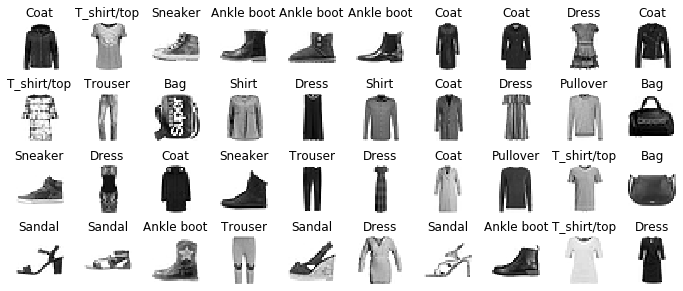

In [10]:
# let's have a look
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Creating the model using the sequential API

Just a classification MLP with two hidden layers.


In [11]:
model = keras.models.Sequential() # creates a Sequential model

model.add(keras.layers.Flatten(input_shape=[28, 28])) # first layer to the model. 
                                                      # It is a Flatten layer whose role is simply to convert 
                                                      # each input image into a 1D array.
                                                      # receives input data X, computes X.reshape(-1, 1)

model.add(keras.layers.Dense(300, activation='relu')) # hidden layer with 300 neurons. Uses the ReLU act.funct.
                                                      
model.add(keras.layers.Dense(100, activation='relu')) # second hidden layer with 100 neurons.

model.add(keras.layers.Dense(10, activation='softmax')) # Dense output layer with 10 neurons (one per class), 
                                                        # using the softmax activation function 
                                                        # (because the classes are exclusive).

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

A cleaner way to do the same:

In [13]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(10, activation="softmax")
])

Next, a summary of the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parame‐ ters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [15]:
model.layers

In [16]:
# model schematic
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

All the parameters of a layer can be accessed using its get_weights() and set_weights() method. For a Dense layer, this includes both the connection weights and the bias terms.

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

##### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

Secondly, regarding the optimizer, "sgd" simply means that we will train the model using simple Stochastic Gradient Descent.

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

##### Training and evaluating the model

Passing validation set is optional.

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4838 - accuracy: 0.8324 - val_loss: 0.4496 - val_accuracy: 0.8452
Epoch 3/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4380 - accuracy: 0.8469 - val_loss: 0.4175 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4127 - accuracy: 0.8557 - val_loss: 0.3900 - val_accuracy: 0.8658
Epoch 5/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3930 - accuracy: 0.8624 - val_loss: 0.3981 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3776 - accuracy: 0.8671 - val_loss: 0.3738 - val_accuracy: 0.8736
Epoch 7/30
55000/55000 [===========================

In [21]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

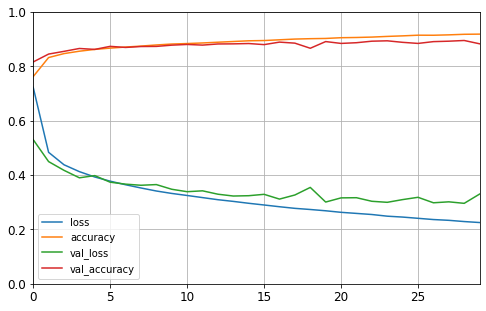

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertical range [0, 1]
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Moreover, the valida‐ tion curves are quite close to the training curves, which means that there is not too much overfitting.

The model performed better on the validation set than on the training set at the beginning of training: this sometimes happens by chance (especially when the validation set is fairly small). However, the training set performance ends up beating the validation performance, as is generally the case when you train for long enough.

Once we are satisfied with your model’s validation accuracy, we should evaluate it on the test set to estimate the generalization error before you deploy the model to production.

In [23]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[56.05914338197569, 0.8568]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). 

##### Making predictions

Since we don’t have actual new instances, we will just use the first 3 instances of the test set:

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

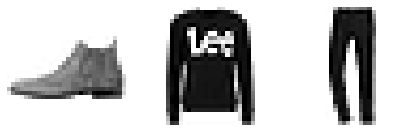

In [35]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
   # plt.title(class_names[y_test], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Building a regression MLP using the sequential API

Using California housing problem.

In [41]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

The main differences with the classifier above are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 93us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5005 - val_l

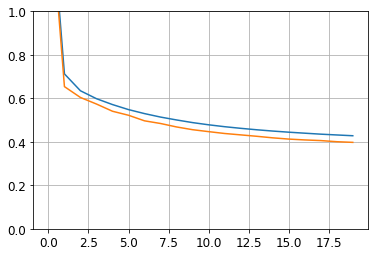

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 2. Functional API

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.



In [47]:
input = keras.layers.Input(shape=X_train.shape[1:]) # First, we need to create an Input object
hidden1 = keras.layers.Dense(30, activation="relu")(input) # Next, Dense layer with 30 neurons nad relu act. fucn.
                                                           # As soon as it is created, notice that we call it like 
                                                           # a function, passing it the input.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # second layer, with output of first hidden layer
concat = keras.layers.Concatenate()([input, hidden2]) # Concatenate() layer 
output = keras.layers.Dense(1)(concat) # output layer, with a single neuron and no activation function
model = keras.models.Model(inputs=[input], outputs=[output]) # model

But what if we want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7):

In [48]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict().

In [49]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [50]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test) 
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 96us/sample - loss: 0.7888 - val_loss: 0.8261
Epoch 2/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4541 - val_loss: 5.3455
Epoch 3/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4320 - val_loss: 11.7336
Epoch 4/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5465 - val_loss: 1.1175
Epoch 5/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4112 - val_loss: 0.7915
Epoch 6/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4086 - val_loss: 1.4727
Epoch 7/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4016 - val_loss: 0.3749
Epoch 8/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3961 - val_loss: 0.3644
Epoch 9/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3831 - val_

Adding an auxiliary output for regularization:

In [51]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [52]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [53]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 138us/sample - loss: 2.6460 - main_output_loss: 2.3417 - aux_output_loss: 5.3749 - val_loss: 8.1957 - val_main_output_loss: 8.2416 - val_aux_output_loss: 7.7446
Epoch 2/20
11610/11610 [==============================] - 1s 67us/sample - loss: 1.1225 - main_output_loss: 0.8258 - aux_output_loss: 3.7914 - val_loss: 1.8533 - val_main_output_loss: 0.9790 - val_aux_output_loss: 9.7152
Epoch 3/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.8447 - main_output_loss: 0.6456 - aux_output_loss: 2.6355 - val_loss: 1.6392 - val_main_output_loss: 0.5842 - val_aux_output_loss: 11.1280
Epoch 4/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.7397 - main_output_loss: 0.5946 - aux_output_loss: 2.0447 - val_loss: 1.6555 - val_main_output_loss: 0.6046 - val_aux_output_loss: 11.1065
Epoch 5/20
11610/11610 [==============================] - 1s 77u